In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


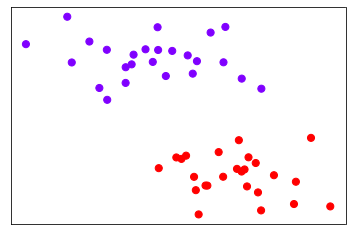

In [9]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6) #centers为聚类中心点个数，cluster_std为每个类别内的方差
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = "rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

<ipython-input-16-8f4d7fb6aac1>:22: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(axisx, axisy, p


(-0.41872382476349596, 5.754870487889891)

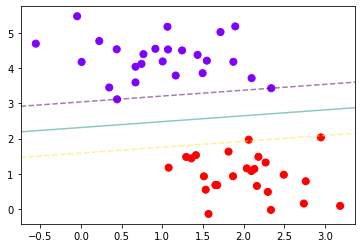

In [16]:
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = "rainbow")

ax = plt.gca() #获取当前的子图，这里前面的散点图已经创建好了，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim()#默认创建（0.0，1.0）范围内的横纵坐标

axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)
axisy, axisx = np.meshgrid(axisy, axisx)
#将特征向量转换为特征矩阵的函数
#核心是将两个特征向量广播，以便获取y.shape * X.shape这个多个坐标点的横坐标和纵坐标
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网络，它是便不再整个画布上的密集的点

#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X, y)
p = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function, 返回每个输入的样本所对应的到决策边界的距离
#然后将这个距离转换为axisx的结构
#画决策边界和平行于决策边界的超平面
ax.contour(axisx, axisy, p
          ,color="k"
          ,levels=[-1,0,1]
          ,alpha=0.5
          ,linestyles=["--","-","--"]
          )
ax.set_xlim(xlim)
ax.set_ylim(ylim)

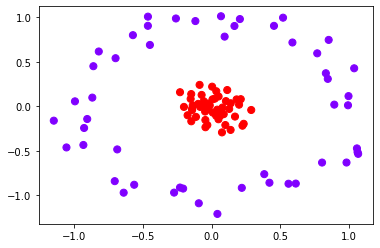

In [17]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor = 0.1, noise = .1)
X.shape
y.shape
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = "rainbow")
plt.show()

<ipython-input-18-8f4d7fb6aac1>:22: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(axisx, axisy, p


(-1.3230071483587036, 1.1244917271443775)

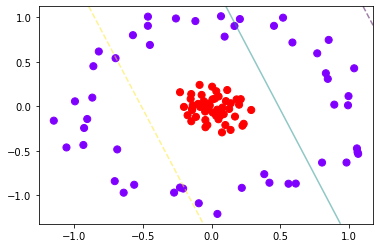

In [18]:
#上面的方法只能解决线性数据

plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = "rainbow")

ax = plt.gca() #获取当前的子图，这里前面的散点图已经创建好了，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim()#默认创建（0.0，1.0）范围内的横纵坐标

axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)
axisy, axisx = np.meshgrid(axisy, axisx)
#将特征向量转换为特征矩阵的函数
#核心是将两个特征向量广播，以便获取y.shape * X.shape这个多个坐标点的横坐标和纵坐标
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网络，它是便不再整个画布上的密集的点

#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X, y)
p = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function, 返回每个输入的样本所对应的到决策边界的距离
#然后将这个距离转换为axisx的结构
#画决策边界和平行于决策边界的超平面
ax.contour(axisx, axisy, p
          ,color="k"
          ,levels=[-1,0,1]
          ,alpha=0.5
          ,linestyles=["--","-","--"]
          )
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [20]:
#定义一个由x计算出来的新维度r，为了解决非线性的情况
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r), max(r), 1)

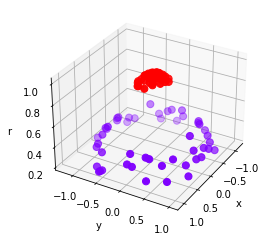

In [21]:
from mpl_toolkits import mplot3d
def plot_3D(elev = 30, azim = 30, X = X, y = y):
    ax = plt.subplot(projection = "3d")
    ax.scatter3D(X[:,0], X[:,1], r, c = y, s = 50, cmap='rainbow')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

plot_3D()

通过增加新的维度就可以实现用一个平面来分隔两类数据，其中计算r，并将r作为数据的第三维度来将数据升维的过程被称为“核变换”，即是将数据投影到高维空间中，在高维空间中计算来找出拆平面的函数就叫做核函数，之前所用的“linear”就是线性核函数，上面使用的计算r的方法，是高斯径向基和函数，在“kernel”中输入“rbf”就可以使用。

<ipython-input-22-20dcbe4fe01f>:20: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(axisx, axisy, p


(-1.3230071483587036, 1.1244917271443775)

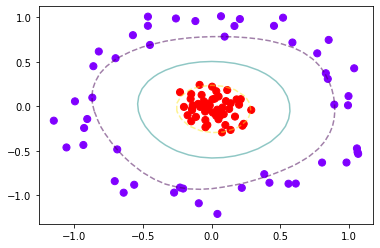

In [22]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c = y, s = 50, cmap="rainbow")
ax = plt.gca() #获取当前的子图，这里前面的散点图已经创建好了，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim()#默认创建（0.0，1.0）范围内的横纵坐标

axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)
axisy, axisx = np.meshgrid(axisy, axisx)
#将特征向量转换为特征矩阵的函数
#核心是将两个特征向量广播，以便获取y.shape * X.shape这个多个坐标点的横坐标和纵坐标
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网络，它是便不再整个画布上的密集的点

p = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function, 返回每个输入的样本所对应的到决策边界的距离
#然后将这个距离转换为axisx的结构
#画决策边界和平行于决策边界的超平面
ax.contour(axisx, axisy, p
          ,color="k"
          ,levels=[-1,0,1]
          ,alpha=0.5
          ,linestyles=["--","-","--"]
          )
ax.set_xlim(xlim)
ax.set_ylim(ylim)